In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Calculate the correlation matrix using the corr() method of the DataFrame
corr_matrix =df.corr()

<ipython-input-36-1bb0c5170461>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  create_mask = np.zeros_like(corr_matrix, dtype=np.bool)


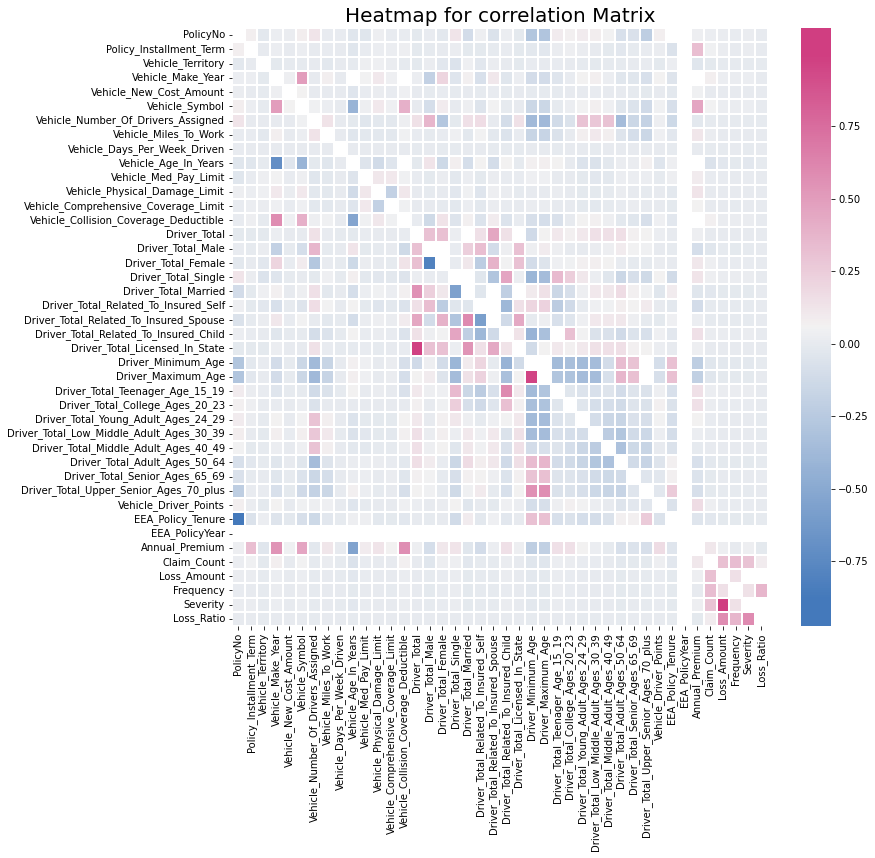

In [ ]:
# Create a new figure with a specified size and add a title to the plot
fig, axis = plt.subplots(figsize=(12, 11))
plt.title("Heatmap for correlation Matrix", fontsize=20)


# Create a mask for significant values in the correlation matrix
create_mask = np.zeros_like(corr_matrix, dtype=np.bool)
create_mask[np.triu_indices_from(create_mask)] = True
create_mask[np.abs(corr_matrix) < 0.5] = False


# Create a custom color map using seaborn's diverging_palette() function
custom_map = sns.diverging_palette(250, 349, as_cmap=True)


# Use seaborn's heatmap() function to create the heatmap of the correlation matrix
sns.heatmap(corr_matrix, ax=axis, cmap=custom_map, mask=create_mask, linewidths=0.1, cbar_kws={"extend":"both", "extendfrac":0.05,"extendrect": True})


# Display the plot using matplotlib's show() method
plt.show()

In [ ]:
from prettytable import PrettyTable

# Compute the correlation between the numeric features and the target variable 'Loss_Ratio'
df_num_correlation = df_num.corr()['Loss_Ratio'][:-1] # 1 because the latest row is Loss_Ratio

# Identify the numeric features that are strongly correlated with 'Loss_Ratio'
list_of_feature = df_num_correlation[abs(df_num_correlation) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Loss Ratio:\n{}".format(len(list_of_feature), list_of_feature))

# Compute the correlation between each individual numeric feature and ‘Loss_Ratio'
list_seperate_feature = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is Loss_Ratio
    # Create a DataFrame with the current feature and 'Loss_Ratio'
    df_new = df_num[[df_num.columns[i], 'Loss_Ratio']]
    # Remove any rows where the current feature has a value of 0
    df_new = df_new[df_new[df_num.columns[i]] != 0]
    # Add the DataFrame to a list of all individual feature correlations
    list_seperate_feature.append(df_new)

# Sort the list of individual feature correlations by correlation coefficient
correlated_features = {feature.columns[0]: feature.corr()['Loss_Ratio'][0] for feature in list_seperate_feature}
correlated_features = sorted(correlated_features.items(), key=lambda x: x[1])

# Create a table with the correlations for each individual numeric feature
pre_table = PrettyTable()
pre_table.field_names = ["Feature", "Correlation"]

for (key, value) in correlated_features:
    pre_table.add_row([key, value])

# Print the table
print(pre_table)


There are 2 strongly correlated values with Loss Ratio:
Severity       0.585348
Loss_Amount    0.578532
Name: Loss_Ratio, dtype: float64
+------------------------------------------+-------------------------+
|                 Feature                  |       Correlation       |
+------------------------------------------+-------------------------+
|              Annual_Premium              |  -0.013339920079666993  |
|   Driver_Total_Young_Adult_Ages_24_29    |  -0.007484243417789255  |
|               Claim_Count                |  -0.0061785537458779165 |
|            Vehicle_Territory             |  -0.0033056865820963754 |
|     Driver_Total_College_Ages_20_23      |  -0.002939781747480398  |
|     Driver_Total_Teenager_Age_15_19      |  -0.0026084656152449985 |
|    Vehicle_Number_Of_Drivers_Assigned    |  -0.002467253158321577  |
|  Driver_Total_Related_To_Insured_Child   |  -0.0022147828417857503 |
|            EEA_Policy_Tenure             |  -0.002064310615584465  |
|          

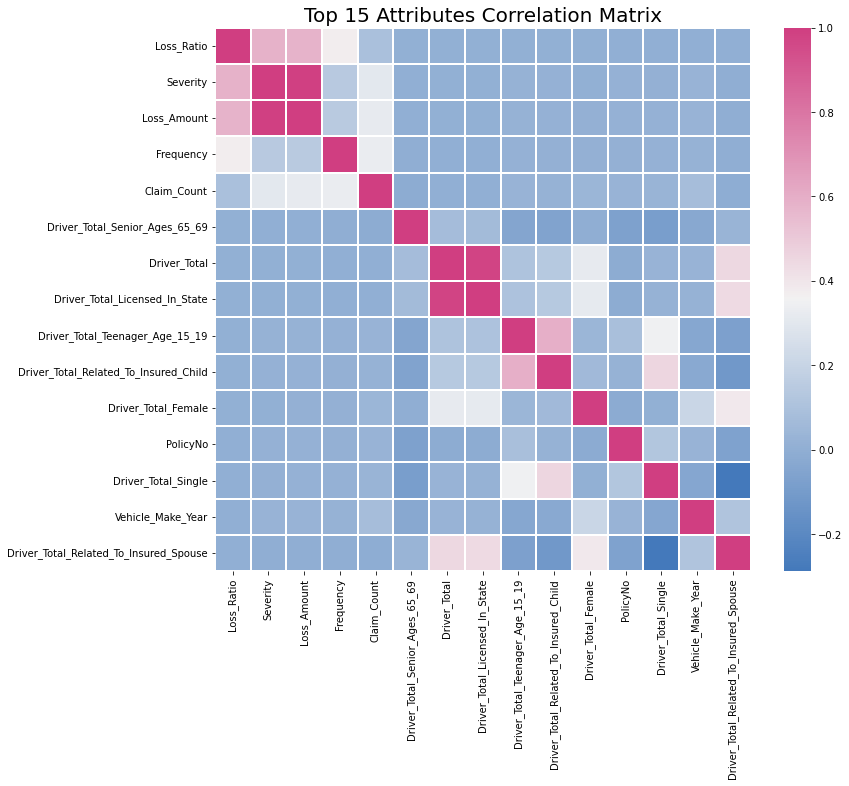

In [ ]:
# Specify the number of top attributes to show in the correlation matrix
num = 15
# Select the top num attributes with the highest correlation to 'Loss_Ratio'
target_col = corr_matrix.nlargest(num, 'Loss_Ratio')['Loss_Ratio'].index

# Compute the correlation matrix for the top num attributes
compute_top = np.corrcoef(df[target_col].values.T)

# Create a new figure with a specified size
fig, axis = plt.subplots(figsize=(12, 10))

# Create a custom color map
custom_map = sns.diverging_palette(250, 349, as_cmap=True)

# Created a heatmap of the correlation matrix for the top num attributes
sns.heatmap(compute_top, ax=axis, cmap=custom_map, linewidths=0.2, yticklabels=target_col.values, xticklabels=target_col.values)

# title 
plt.title('Top {} Attributes Correlation Matrix'.format(num), fontsize=20)

# Display the plot
plt.show()